<a href="https://colab.research.google.com/github/vitamingyu/NLP-LLM/blob/main/tf_51AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 변이형 오토인코더(Variational AutoEncoder)
# 오토인코더(AutoEncoder, AE)는 잠재 공간의 값을 고정된 값(표현벡터)으로 나타냈지만
# 변이형 오토인코더(VAE)는 잠재 공간의 값을 가우시안 확률분포(정규분포) 값의 범위로 제공한다.
# 즉, 잠재 공간의 값은 평균과 분산으로 매핑된다.
# 이미지 데이터가 충분하지 않은 분야에서 활용

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_train = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

autoencoder = Sequential()

# encoder : 모델은 고차원 입력 데이터를 저차원 표현벡터로 압축. (차원축소, 특징 추출)
autoencoder.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))

# decoder : 모델은 주어진 표현벡터를 원본차원 압축을 해제. (차원복구)
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

print(autoencoder.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 8)          

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_test, x_test), verbose=2)
print(history.history)

Epoch 1/30
79/79 - 44s - loss: 0.3430 - val_loss: -4.6572e+02 - 44s/epoch - 551ms/step
Epoch 2/30
79/79 - 30s - loss: 0.1237 - val_loss: -5.0155e+02 - 30s/epoch - 380ms/step
Epoch 3/30
79/79 - 39s - loss: 0.0986 - val_loss: -5.0581e+02 - 39s/epoch - 495ms/step
Epoch 4/30
79/79 - 54s - loss: 0.0911 - val_loss: -5.0654e+02 - 54s/epoch - 678ms/step
Epoch 5/30
79/79 - 58s - loss: 0.0875 - val_loss: -5.0536e+02 - 58s/epoch - 738ms/step
Epoch 6/30
79/79 - 37s - loss: 0.0842 - val_loss: -5.0508e+02 - 37s/epoch - 464ms/step
Epoch 7/30
79/79 - 30s - loss: 0.0823 - val_loss: -5.0465e+02 - 30s/epoch - 378ms/step
Epoch 8/30
79/79 - 32s - loss: 0.0806 - val_loss: -5.0667e+02 - 32s/epoch - 405ms/step
Epoch 9/30
79/79 - 31s - loss: 0.0791 - val_loss: -5.0336e+02 - 31s/epoch - 388ms/step
Epoch 10/30
79/79 - 31s - loss: 0.0779 - val_loss: -5.0612e+02 - 31s/epoch - 388ms/step
Epoch 11/30
79/79 - 30s - loss: 0.0770 - val_loss: -5.0589e+02 - 30s/epoch - 383ms/step
Epoch 12/30
79/79 - 30s - loss: 0.0763 - 

313/313 [==============================] - 8s 26ms/step


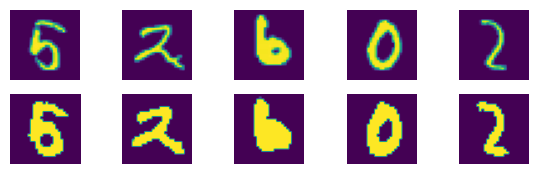

In [9]:
random_test = np.random.randint(x_test.shape[0], size=5)
ae_imgs = autoencoder.predict(x_test)

# 시각화
plt.figure(figsize=(7,2))
for i, image_idx in enumerate(random_test):
  ax = plt.subplot(2, 5, i+1)
  plt.imshow(x_test[image_idx].reshape(28,28))
  ax.axis('off')

  ax = plt.subplot(2, 5, i + 5 + 1)
  plt.imshow(ae_imgs[image_idx].reshape(28,28))
  ax.axis('off')

plt.show()

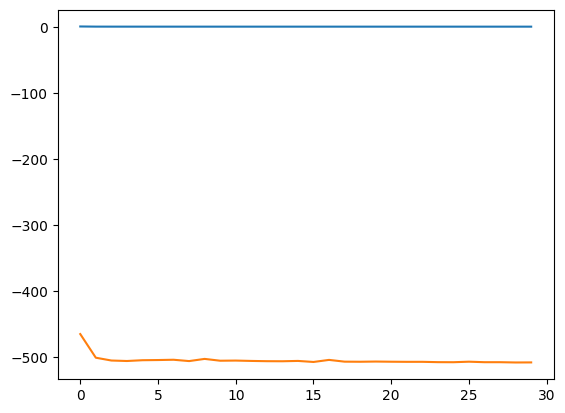

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.show()